## Singapore Rainfall data for the location (1.30◦N,103.68◦E), collected in year 2010 from ground-based sky imager.
Exploratory analysis - Initial Ploting and Data Parsing.

In [23]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')

In [21]:
rainfall_df = pd.read_csv("imagerdata.csv", header=None, names=["day", "hour", "minute", "rainfall_rate"])
# Initial Testing for NaN values.
rainfall_df.dropna(inplace=True)
print(rainfall_df.head())

   day  hour  minute  rainfall_rate
0    1     0       0              0
1    1     0       1              0
2    1     0       2              0
3    1     0       3              0
4    1     0       4              0


In [49]:
# Parsing the Dates
rainfall_df['date']=pd.to_datetime(rainfall_df['day'], unit='D', origin=pd.Timestamp('2009-12-31')) # Using day number to create the date
rainfall_df['timestamp'] = rainfall_df['date'] + pd.to_timedelta(rainfall_df['hour'].astype('str') + ':' + rainfall_df['minute'].astype('str') + ':00') # append the timedelta in hours and minutes to get the full timestamp
rainfall_df.set_index('timestamp', inplace=True)

Text(0, 0.5, 'Rainfall Rate')

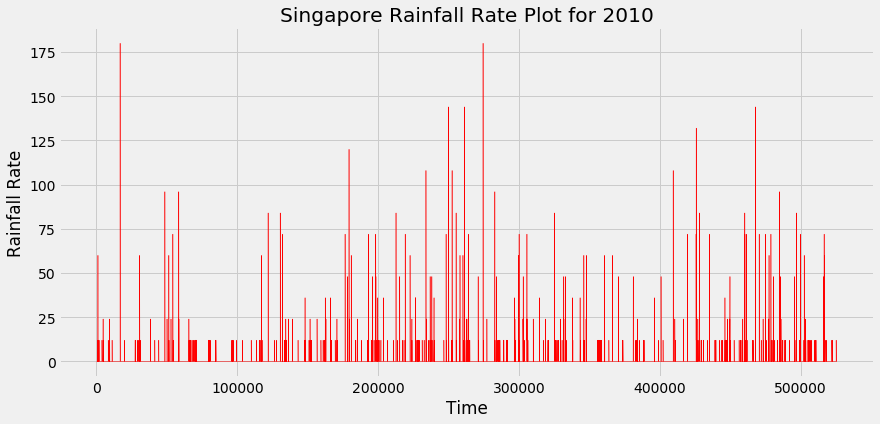

In [26]:
# Initial Yearly Plot
plt.rcParams["figure.figsize"] = (13,6) # For Increasing Size of graph
plt.plot(rainfall_df.index.values, rainfall_df['rainfall_rate'], linewidth=0.5, color='r')
plt.title('Singapore Rainfall Rate Plot for 2010')
plt.xlabel('Time')
plt.ylabel('Rainfall Rate')

### Calculate the daily rainfall rate.
For this `Group-By` is to be used for grouping together based on the day for each month.

In [28]:
daily_groups = dataframe.groupby([dataframe.index.month, dataframe.index.day])['rainfall_rate'].sum() # grouping based on the month and day.

Text(0, 0.5, 'Rainfall Rate')

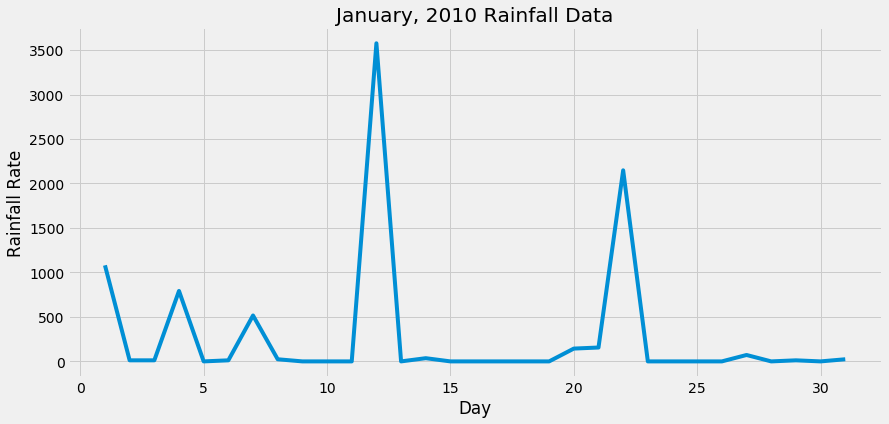

In [29]:
# For example plot the January Data
plt.title("January, 2010 Rainfall Data")
plt.plot(daily_groups[1])
plt.xlabel('Day')
plt.ylabel('Rainfall Rate')

In [5]:
# Complicated
# def parse_date(day):
#     start = datetime(2009,12,31)
#     delta = timedelta(days=int(day))
#     new_date = start + delta
#     return new_date
# dataframe['date'] = dataframe['day'].astype(str).map(parse_date)

/Users/dhirajsaharia/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


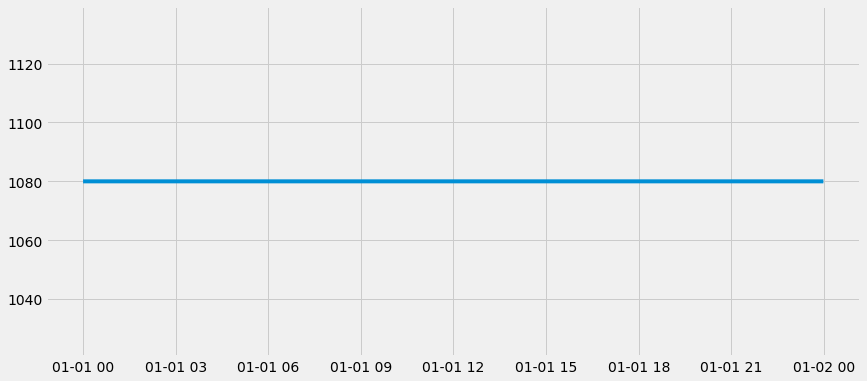

In [70]:
# Experimental code for making timestamp x-axis
g = dataframe.groupby([dataframe.index.month, dataframe.index.day])
january = g.get_group((1,1))
january['rate'] = january['rainfall_rate'].sum()
plt.plot(january.index, january['rate'])